# Stock Market Data Analysis

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance  # Using this module to download the stock data from Yahoo Finance.

import warnings  # For quieter charts. 
from mplcursors import cursor

sns.set_theme(style="darkgrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

stocks = {
    "AAPL": "#979797",
    "GOOG": "#FEBD00",
    "META": "#0081FB",
    "MSFT": "#7DB700",
    "NFLX": "#D81F26",
    "TSLA": "#111111"
}

tickers, colours = yfinance.Tickers(list(stocks.keys())), stocks.values()

history = tickers.history(start="2024-01-01", end="2024-03-31")

history.head()

[**********************67%%******                ]  4 of 6 completed

[*********************100%%**********************]  6 of 6 completed


Price            Close                                                  \
Ticker            AAPL        GOOG        META        MSFT        NFLX   
Date                                                                     
2024-01-02  185.403412  139.559998  345.922974  370.185425  468.500000   
2024-01-03  184.015198  140.360001  344.104889  369.915924  470.260010   
2024-01-04  181.678177  138.039993  346.752075  367.260834  474.670013   
2024-01-05  180.949097  137.389999  351.576996  367.071198  474.059998   
2024-01-08  185.323517  140.529999  358.279877  373.998383  485.029999   

Price                  Dividends                 ... Stock Splits            \
Ticker            TSLA      AAPL GOOG META MSFT  ...         META MSFT NFLX   
Date                                             ...                          
2024-01-02  248.419998       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2024-01-03  238.449997       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2024-01-04  237.929993       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2024-01-05  237.490005       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2024-01-08  240.449997       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   

Price              Volume                                                    
Ticker     TSLA      AAPL      GOOG      META      MSFT     NFLX       TSLA  
Date                                                                         
2024-01-02  0.0  82488700  20071900  19042200  25258600  5049400  104654200  
2024-01-03  0.0  58414500  18974300  15451100  23083500  3443700  121082600  
2024-01-04  0.0  71983600  18253300  12099900  20901500  3636500  102629300  
2024-01-05  0.0  62303300  15433200  13920700  20987000  2612500   92379400  
2024-01-08  0.0  59144500  17645300  13890200  23134000  3675800   85166600  

[5 rows x 42 columns]

In [137]:
close_history = history["Close"]
close_history.describe()

Ticker,AAPL,GOOG,META,MSFT,NFLX,TSLA
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,181.724413,144.343114,445.833012,404.462310,563.816723,195.374755
std,7.326303,5.437619,56.402781,15.337791,52.033118,21.240887
min,169.000000,132.559998,344.104889,367.071198,468.500000,162.500000
25%,173.720001,140.360001,389.726501,398.163696,544.869995,178.649994
50%,182.630005,144.080002,471.250000,406.559998,575.130005,189.559998
75%,186.621872,148.479996,491.829987,414.920013,605.880005,207.830002
max,194.931259,154.839996,512.190002,429.369995,629.239990,248.419998


## Time Series Analysis

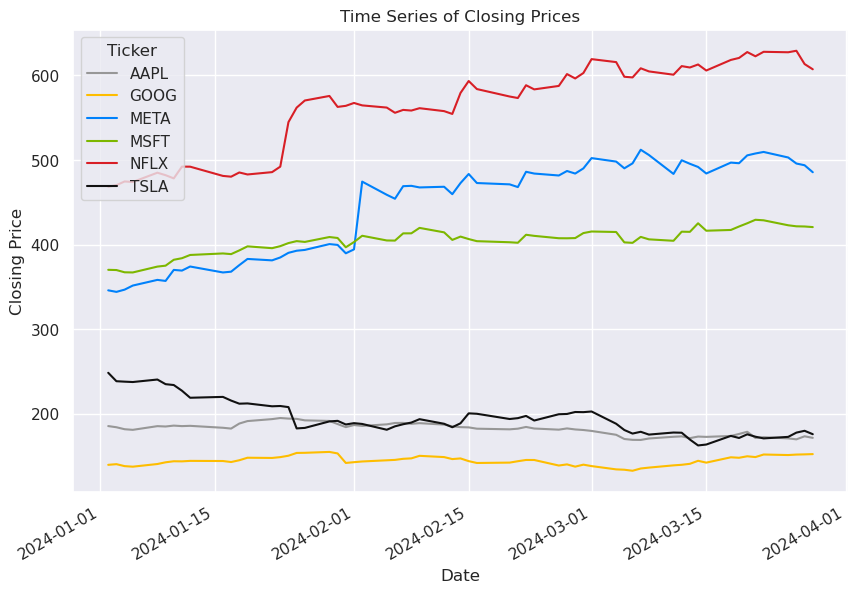

In [138]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=close_history, ax=ax, palette=colours, dashes=False)
ax.set(
    title="Time Series of Closing Prices",
    xlabel = "Date",
    ylabel="Closing Price"
    )

crs = cursor(ax,hover=True)  # Adds mouseover annotations
crs.connect("add", lambda selection: selection.annotation.set_text(f"Open Value: {selection.target[1]:.2f}"))

plt.xticks(rotation=30, ha="right")
plt.show()

From this line chart, we can observe quite a large increase in stock price that happened in mid-to-late-January for NFLX, and a similar jump with META roughly week later just at the start of February.

If we look at some news articles at the time where NFLX had a large bump in value, we can observe that this is largely due an influx of signups to Netflix's service after a crackdown on password sharing as seen in this article by the [Financial Times](https://www.ft.com/content/0a3e8c61-8fd2-4f28-887a-7f86d9755629).

Similarly, META had a jump in value at the beginning of February. We can see that this is likely due to the announcement that [they would start paying a dividend](https://www.investorschronicle.co.uk/news/2024/02/02/meta-shares-soars-on-dividend-and-ai-ambition/).

TSLA seems to be doing less well in value. There's a downward trend throughout the three months with a noticeable hit around the same time NFLX's prices jumped up. [This BBC article](https://www.bbc.co.uk/news/business-68102516) explains that this was due to an announcement by Elon Musk warning that the company's sales growth would be weaker than the previous year.

## Volatility Analysis

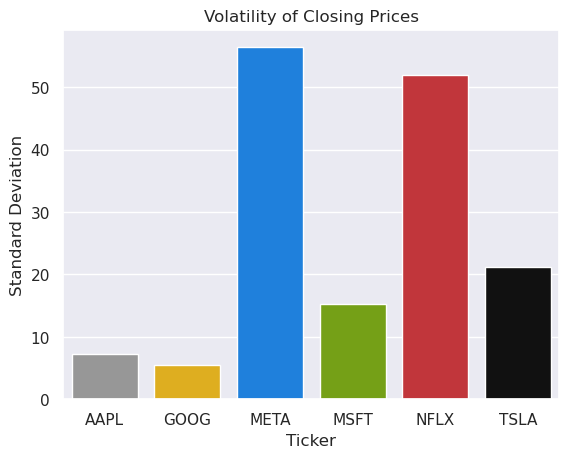

In [139]:
volatility = close_history.std()

ax = sns.barplot(
    x=volatility.index,
    y=volatility.values,
    palette=colours
    )

ax.set(
    title="Volatility of Closing Prices",
    xlabel = "Ticker",
    ylabel="Standard Deviation",
    )

crs = cursor(ax,hover=True)
crs.connect("add", lambda selection: selection.annotation.set_text(f"Standard Deviation: {selection.target[1]:.2f}"))


plt.show()


This chart shows that META and NFLX stocks experienced a lot more price fluctuation during this period compared to the other three stocks. 
This is largely due to the jump in stock price we saw in the previous chart.

## Correlation Analysis

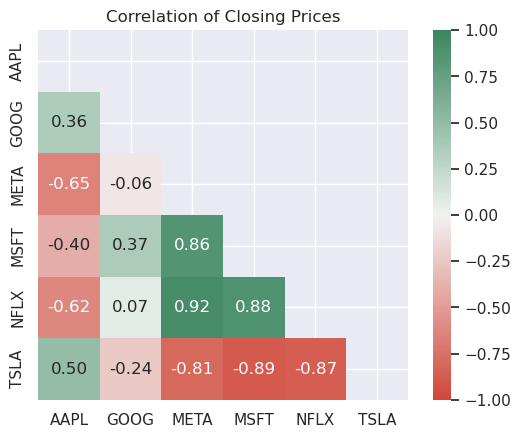

In [140]:
correlation_matrix = close_history.corr()

# This removes the duplicate values and the correlation of each stock to itself.
correlation_matrix = correlation_matrix.mask(np.triu(np.ones_like(correlation_matrix, dtype=bool)))

ax = sns.heatmap(
    data=correlation_matrix,
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(15, 145, as_cmap=True),
    square=True,
    annot=True,
    fmt=".2f"
    )

ax.set(
    title="Correlation of Closing Prices",
    xlabel=None,
    ylabel=None
    )

plt.show()

We can see from the heatmap that there are varying levels of positive and negative correlations between the closing price of each stock, with some pairs showing stronger correlations than others. 

META seems to have a very high positive correlation with MSFT and NFLX while there is virtually no correlation with GOOG.

## Comparative Analysis

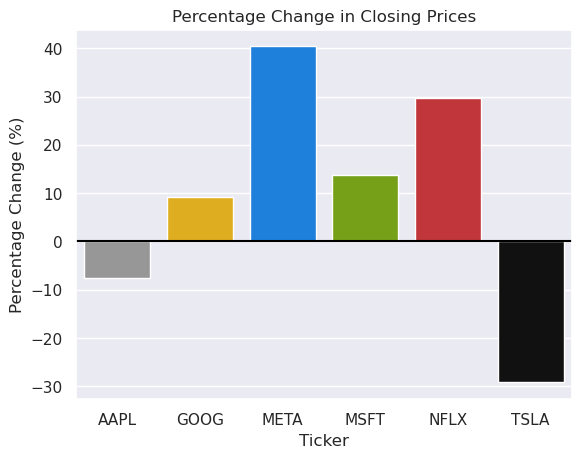

In [141]:
percentage_change = ((close_history.iloc[-1] - close_history.iloc[0]) / close_history.iloc[0]) * 100

ax = sns.barplot(
    data=percentage_change,
    palette=colours
    )

ax.set(
    title="Percentage Change in Closing Prices",
    xlabel="Ticker",
    ylabel="Percentage Change (%)"
)

plt.axhline(0, color="black")

plt.show()

META had the highest positive change with a 42.8% increase in value.

TSLA on the other hand had the largest negative change of around -30.1%.

## Risk vs Return Analysis

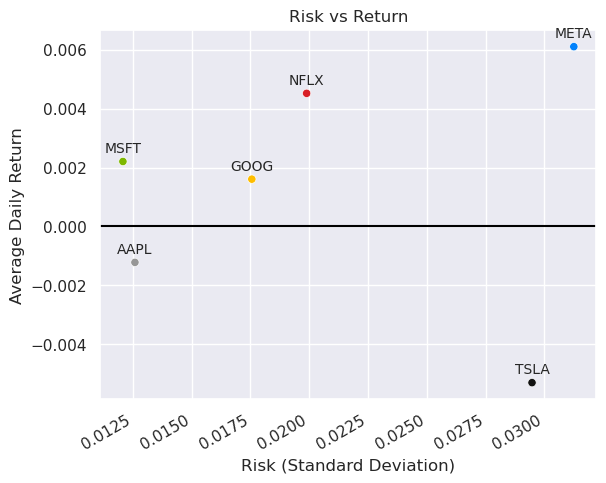

In [142]:
daily_returns = close_history.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

ax = sns.scatterplot(
    data=risk_return_df,
    x=risk_return_df["Risk"],
    y=risk_return_df["Average Daily Return"],
    hue=risk_return_df.index,
    palette=colours,
    legend=False
    )

ax.set(
    title="Risk vs Return",
    xlabel="Risk (Standard Deviation)",
    ylabel="Average Daily Return"
)

for line in range(risk_return_df.shape[0]):
     ax.text(risk_return_df["Risk"][line], risk_return_df["Average Daily Return"][line]+0.0003, 
     risk_return_df.index[line], horizontalalignment="center", 
     size="small")

plt.xticks(rotation=30, ha="right")
plt.axhline(0, color="black")

plt.show()

MSFT appears to have the lowest risk of all the stocks, with a higher daily return than GOOG which suggests it's likely a more stable investment.

META had the highest risk but also the highest return which 